# Unsupervised Learning

## Clustering points

Import Python modules:

In [18]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook

Create data points (unlabeled) to be clustered:

In [19]:
X = np.array([[1,1], [2,2.5], [3,1.2], [5.5,6.3], [6,9], [7,6], [8,8]])

Plot them:

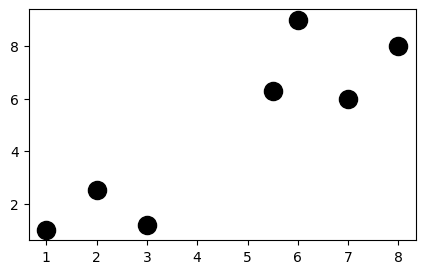

In [20]:
plt.figure(figsize=(5,3))
plt.scatter(X[:,0], X[:,1], s = 170, color = 'black')
plt.show()

Import the `k-means` algorithm to cluster them:

In [21]:
from sklearn.cluster import KMeans

Run `k-means` with `k = 2`:

In [22]:
k = 2
kmeans = KMeans(n_clusters = k, n_init = 'auto')
kmeans.fit(X);
centroids = kmeans.cluster_centers_ # Get centroid's coordinates
labels = kmeans.labels_ # Get label assignment

Plot the points with label assignments as given by `kmeans`:

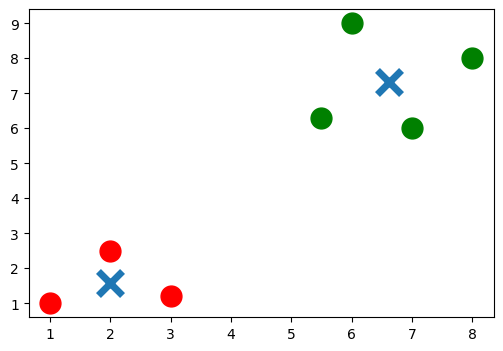

In [23]:
colors = ['r.', 'g.'] # Define two colors for the plot below
plt.figure(figsize=(6,4))
for i in range(len(X)):
    plt.plot(X[i,0], X[i,1], colors[labels[i]], markersize = 30)
plt.scatter(centroids[:,0],centroids[:,1], marker = "x", s = 300, linewidths=5)
plt.show()

Run `k-means` with `k = 3`:

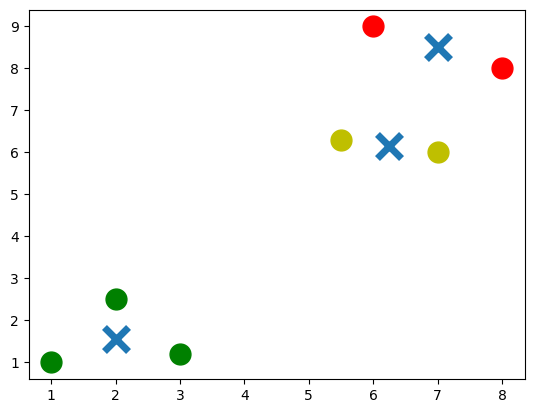

In [24]:
k = 3
kmeans = KMeans(n_clusters = k, n_init = 'auto')
kmeans.fit(X);
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
colors = ['r.', 'g.', 'y.']
plt.figure()
for i in range(len(X)):
    plt.plot(X[i,0], X[i,1], colors[labels[i]], markersize = 30)
plt.scatter(centroids[:,0],centroids[:,1], marker = "x", s = 300, linewidths=5)
plt.show()

Run `k-means` with `k = 7`:

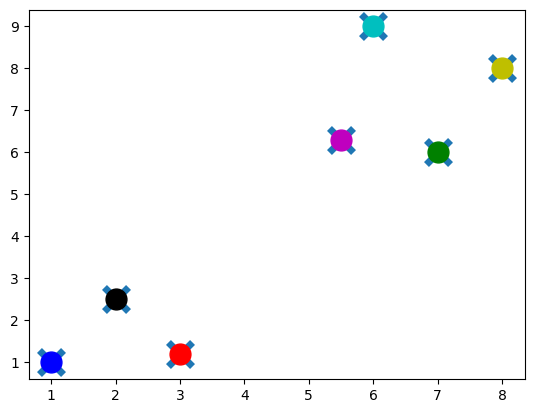

In [25]:
k = 7
kmeans = KMeans(n_clusters = k, n_init = 'auto')
kmeans.fit(X);
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
colors = ['r.', 'g.', 'y.', 'c.', 'b.', 'k.', 'm.']
plt.figure()
for i in range(len(X)):
    plt.plot(X[i,0], X[i,1], colors[labels[i]], markersize = 30)
plt.scatter(centroids[:,0],centroids[:,1], marker = "x", s = 300, linewidths=5)
plt.show()

## Clustering documents

Create the following list of strings:

In [26]:
corpus = ['I love GEC. The team is awesome, awesome, awesome!',
          'I have a dog and a cat.',
          'Best part of GEC? The team. And Oxford professors!',
          'My dog keeps chasing my cat. Dog!']

Create the `bags-of-words` matrix:

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words = 'english')
Z = count_vect.fit_transform(corpus)
Z.todense()

matrix([[3, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1],
        [0, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0]])

Take a look at the words in the vocabulary:

In [28]:
vocab = count_vect.get_feature_names_out()
print(vocab)

['awesome' 'best' 'cat' 'chasing' 'dog' 'gec' 'keeps' 'love' 'oxford'
 'professors' 'team']


Create `frequency` matrix:

In [29]:
Y = Z / Z.sum(axis=1)
print(Y)

<COOrdinate sparse matrix of dtype 'float64'
	with 15 stored elements and shape (4, 11)>
  Coords	Values
  (0, 7)	0.16666666666666666
  (0, 5)	0.16666666666666666
  (0, 10)	0.16666666666666666
  (0, 0)	0.5
  (1, 4)	0.5
  (1, 2)	0.5
  (2, 5)	0.2
  (2, 10)	0.2
  (2, 1)	0.2
  (2, 8)	0.2
  (2, 9)	0.2
  (3, 4)	0.4
  (3, 2)	0.2
  (3, 6)	0.2
  (3, 3)	0.2


Even better, create `Term Frequency times Inverse Document Frequency` matrix:

In [30]:
# Create tf–idf matrix
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(corpus)
X.todense()

matrix([[0.89469821, 0.        , 0.        , 0.        , 0.        ,
         0.23513012, 0.        , 0.29823274, 0.        , 0.        ,
         0.23513012],
        [0.        , 0.        , 0.70710678, 0.        , 0.70710678,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.48546061, 0.        , 0.        , 0.        ,
         0.38274272, 0.        , 0.        , 0.48546061, 0.48546061,
         0.38274272],
        [0.        , 0.        , 0.34884223, 0.44246214, 0.69768446,
         0.        , 0.44246214, 0.        , 0.        , 0.        ,
         0.        ]])

Run `k-means` with `k = 2`:

In [31]:
k = 2
# Define the proper notion of distance to deal with documents
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)
model = KMeans(n_clusters = k, n_init = 'auto')
model.fit(X);

Visualize output:

In [32]:
print("Top terms per cluster:\n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print("Cluster %i:" % i, end='')
    for ind in order_centroids[i, :3]:
        print(' %s,' % terms[ind], end='')
    print("")

Top terms per cluster:

Cluster 0: awesome, gec, team,
Cluster 1: dog, cat, chasing,


## Clustering movies based on their IDMB synopses

https://docs.google.com/spreadsheets/d/1udJ4nd9EKlX_awB90JCbKaStuYh6aVjh1X6j8iBUXIU/.
Let us import this table into Python:

In [33]:
import pandas as pd # Pandas provides easy-to-use data structures
from io import StringIO
import requests

act = requests.get('https://docs.google.com/spreadsheets/d/1udJ4nd9EKlX_awB90JCbKaStuYh6aVjh1X6j8iBUXIU/export?format=csv')
dataact = act.content.decode('utf-8') # To convert to string for Stringio
frame = pd.read_csv(StringIO(dataact))

Have a look:

In [34]:
print(frame)

                     Title                                           Synopsis
0       Mad Max: Fury Road  Max Rockatansky (Tom Hardy) explains in a voic...
1               The Matrix  The screen is filled with green, cascading cod...
2        The King's Speech  The film opens with Prince Albert, Duke of Yor...
3   No Country for Old Men  The film opens with a shot of desolate, wide-o...
4         A Beautiful Mind  John Nash (Russell Crowe) arrives at Princeton...
5                Inception  A young man, exhausted and delirious, washes u...
6                   Frozen  The Walt Disney Pictures logo and the movie ti...
7            The Lion King  The Lion King takes place in the Pride Lands o...
8                  Aladdin  The film starts with a street peddler, guiding...
9               Cinderella  The film opens in a tiny kingdom, and shows us...
10            Finding Nemo  Two clownfish, Marlin (Albert Brooks) and his ...
11               Toy Story  A boy called Andy Davis (voice: John

Create list of string as in the previous example:

In [35]:
corpus = []
for i in range(0, frame["Synopsis"].size):
    corpus.append(frame["Synopsis"][i])

Create `frequency` matrix:

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', min_df = 0.2)
X = vectorizer.fit_transform(corpus)

Run `k-means` with `k = 2`:

In [37]:
k = 2
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)
model = KMeans(n_clusters = k, n_init = 'auto')
model.fit(X);

Visualize output:

In [ ]:
no_words = 3 # Number of words to print per cluster
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
labels = model.labels_

print("Top terms per cluster:\n")
for i in range(k):
    
    print("Cluster %d movies:" % i, end='')
    for title in frame["Title"][labels == i]:
        print(' %s,' % title, end='')
    print() #add a whitespace

    print("Cluster %d words:" % i, end='') 
    for ind in order_centroids[i, :no_words]:
        print (' %s' % terms[ind], end=','),
    print()
    print()


Top terms per cluster:

Cluster 0 movies: The King's Speech, A Beautiful Mind, Frozen, The Lion King, Aladdin, Cinderella, Finding Nemo, Robin Hood,
Cluster 0 words: king, prince, john,

Movie: The King's Speech
Contains 'John': True
Synopsis: The film opens with Prince Albert, Duke of York (later King George VI), known to his wife and family as "Bertie" (Colin Firth), the second son of King George V, speaking at the close of the 1925 British Empire Exhibition at Wembley Stadium, with his wife Elizabeth (Helena Bonham Carter) by his side. His stammering speech visibly unsettles the thousands of listeners in the audience. The prince tries several unsuccessful treatments and gives up, until the Duchess persuades him to see Lionel Logue (Geoffrey Rush), an Australian speech therapist. In their first session, Logue requests that they address each other by their Christian names, a breach of royal etiquette: Logue tells the prince that he will be calling him Bertie from now on. At first, Ber

# Reinforcement Learning

## Multi-Armed Bandits

### Comparison of epsilon greedy, UCB, and Thompson sampling

Define algorithms

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Multi-Armed Bandit class
class MultiArmedBandit:
    def __init__(self, probs):
        self.num_arms = len(probs)
        self.true_probs = np.array(probs)
        
    def get_reward(self, arm):
        return np.random.binomial(1, self.true_probs[arm])
        

# Epsilon-Greedy Algorithm
def epsilon_greedy(bandit, epsilon, num_pulls):
    num_arms = bandit.num_arms
    Q = np.zeros(num_arms)
    N = np.zeros(num_arms)
    cumulative_reward = np.zeros(num_pulls)
    cumulative_regret = np.zeros(num_pulls)
    chosen_arms = np.zeros(num_pulls, dtype=int)
    
    for i in range(num_pulls):
        if np.random.random() < epsilon:
            arm = np.random.choice(num_arms)
        else:
            arm = np.argmax(Q)
        
        reward = bandit.get_reward(arm)
        cumulative_reward[i] = cumulative_reward[max(i-1, 0)] + reward
        cumulative_regret[i] = cumulative_regret[max(i-1, 0)] + np.max(bandit.true_probs) - bandit.true_probs[arm]
        N[arm] += 1
        Q[arm] += (reward + Q[arm]*(N[arm]-1)) / N[arm]
        chosen_arms[i] = arm
    
    return cumulative_reward, cumulative_regret, chosen_arms


# Upper Confidence Bound (UCB) Algorithm
def UCB(bandit, c, num_pulls):
    num_arms = bandit.num_arms
    Q = np.zeros(num_arms)
    N = np.ones(num_arms)
    cumulative_reward = np.zeros(num_pulls)
    cumulative_regret = np.zeros(num_pulls)
    chosen_arms = np.zeros(num_pulls, dtype=int)
    
    for i in range(num_pulls):
        ucb_values = Q + c * np.sqrt(np.log(i + 1) / N)
        arm = np.argmax(ucb_values)
        
        reward = bandit.get_reward(arm)
        cumulative_reward[i] = cumulative_reward[max(i-1, 0)] + reward
        cumulative_regret[i] = cumulative_regret[max(i-1, 0)] + np.max(bandit.true_probs) - bandit.true_probs[arm]
        N[arm] += 1
        Q[arm] += (reward + Q[arm]*(N[arm]-1)) / N[arm]
        chosen_arms[i] = arm
    
    return cumulative_reward, cumulative_regret, chosen_arms

# Thompson Sampling Algorithm
def thompson_sampling(bandit, num_pulls):
    num_arms = bandit.num_arms
    successes = np.zeros(num_arms)  # Number of successes for each arm
    failures = np.zeros(num_arms)  # Number of failures for each arm
    rewards = np.zeros(num_pulls)  # Cumulative rewards over time
    cumulative_reward = np.zeros(num_pulls)
    cumulative_regret = np.zeros(num_pulls)
    chosen_arms = np.zeros(num_pulls, dtype=int)
    
    for i in range(num_pulls):
        theta_samples = [beta(successes[i] + 1, failures[i] + 1).rvs() for i in range(num_arms)]
        arm = np.argmax(theta_samples)
        
        reward = bandit.get_reward(arm)
        if reward == 1:
            successes[arm] += 1
        else:
            failures[arm] += 1
        
        rewards[i] = reward
        cumulative_reward[i] = cumulative_reward[max(i-1, 0)] + reward
        cumulative_regret[i] = cumulative_regret[max(i-1, 0)] + np.max(bandit.true_probs) - bandit.true_probs[arm]
        chosen_arms[i] = arm
    
    return cumulative_reward, cumulative_regret, chosen_arms

Run single instance

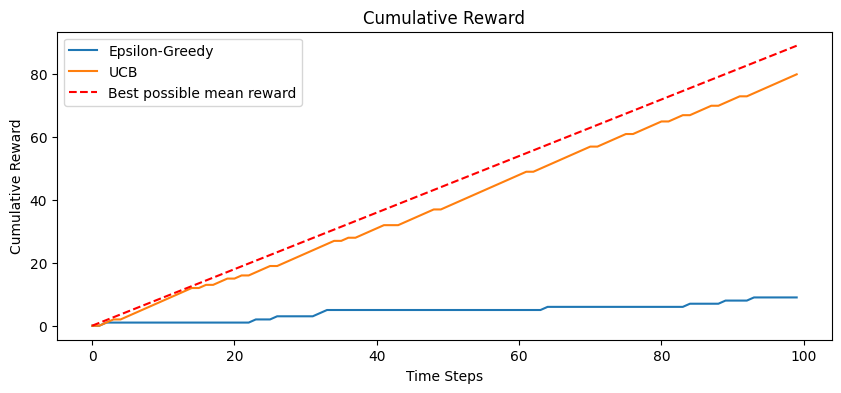

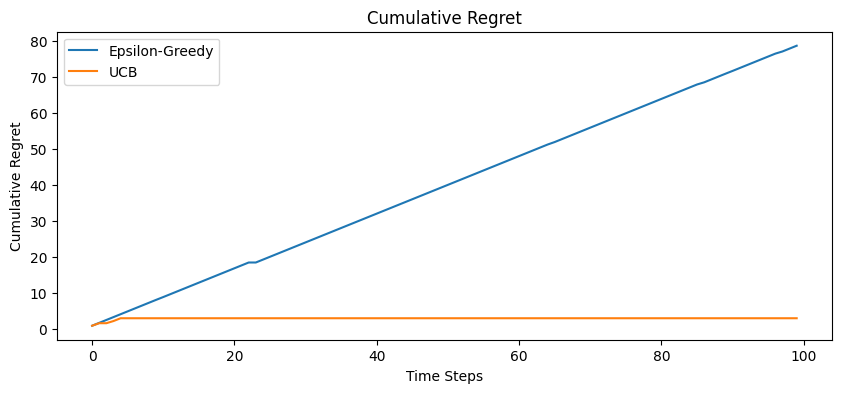

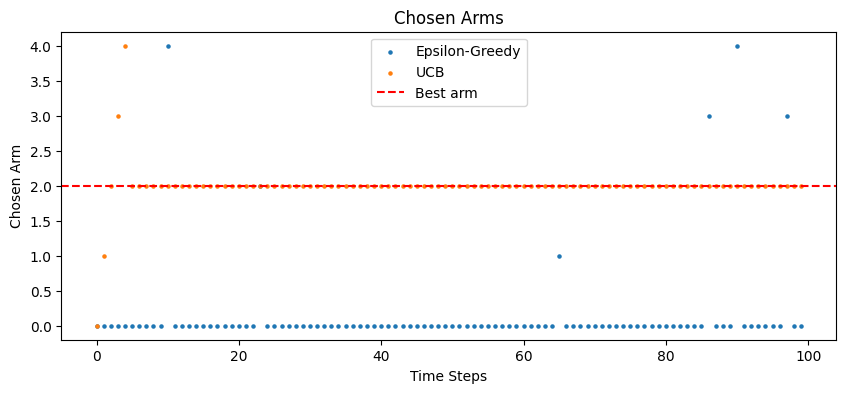

In [40]:
# Parameters
num_arms = 5
num_pulls = 100
epsilon = 0.1 # This is the exploration parameter of epsilon-greedy
c = 2 # This is the exploration parameter of UCB
probs = [0.1, 0.2, 0.9, 0.3, 0.12]  # Enter your desired probabilities here

# Create a multi-armed bandit instance
bandit = MultiArmedBandit(probs)

# Run epsilon-greedy algorithm
epsilon_cumulative_reward, epsilon_cumulative_regret, epsilon_chosen_arms = epsilon_greedy(bandit, epsilon, num_pulls)

# Run UCB algorithm
ucb_cumulative_reward, ucb_cumulative_regret, ucb_chosen_arms = UCB(bandit, c, num_pulls)

# Run Thompson Sampling algorithm
#thompson_cumulative_reward, thompson_cumulative_regret, thompson_chosen_arms = thompson_sampling(bandit, num_pulls)

# Plotting
time_steps = np.arange(num_pulls)

# Plot cumulative reward
plt.figure(figsize=(10, 4))
plt.plot(time_steps, epsilon_cumulative_reward, label='Epsilon-Greedy')
plt.plot(time_steps, ucb_cumulative_reward, label='UCB')
#plt.plot(time_steps, thompson_cumulative_reward, label='Thompson')
plt.plot(time_steps, np.max(bandit.true_probs) * time_steps, label='Best possible mean reward', linestyle='--', color='red')
plt.xlabel('Time Steps')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.title('Cumulative Reward')
plt.show()

# Plot cumulative regret
plt.figure(figsize=(10, 4))
plt.plot(time_steps, epsilon_cumulative_regret, label='Epsilon-Greedy')
plt.plot(time_steps, ucb_cumulative_regret, label='UCB')
#plt.plot(time_steps, thompson_cumulative_regret, label='Thompson')
plt.xlabel('Time Steps')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.title('Cumulative Regret')
plt.show()

# Plot chosen arms
plt.figure(figsize=(10, 4))
plt.scatter(time_steps, epsilon_chosen_arms, label='Epsilon-Greedy', s=5)
plt.scatter(time_steps, ucb_chosen_arms, label='UCB', s=5)
#plt.scatter(time_steps, thompson_chosen_arms, label='Thompson', s=5)
plt.axhline(y = probs.index(np.max(bandit.true_probs)), label='Best arm', linestyle='--', color='red')
plt.xlabel('Time Steps')
plt.ylabel('Chosen Arm')
plt.legend()
plt.title('Chosen Arms')
plt.show()

Run multiple instances, compute means and standard deviations

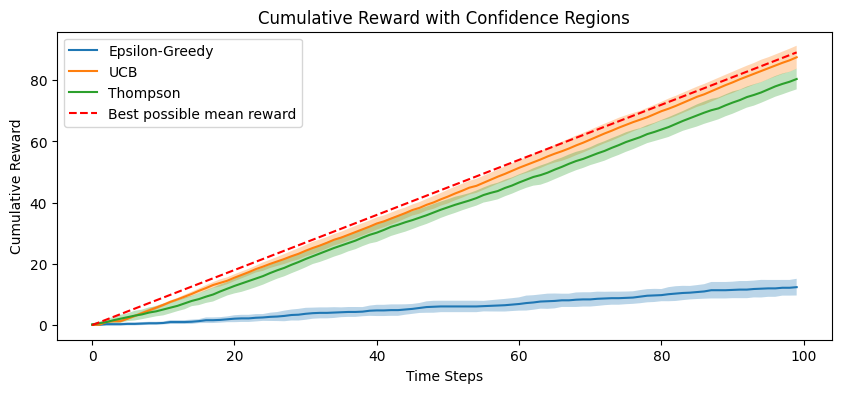

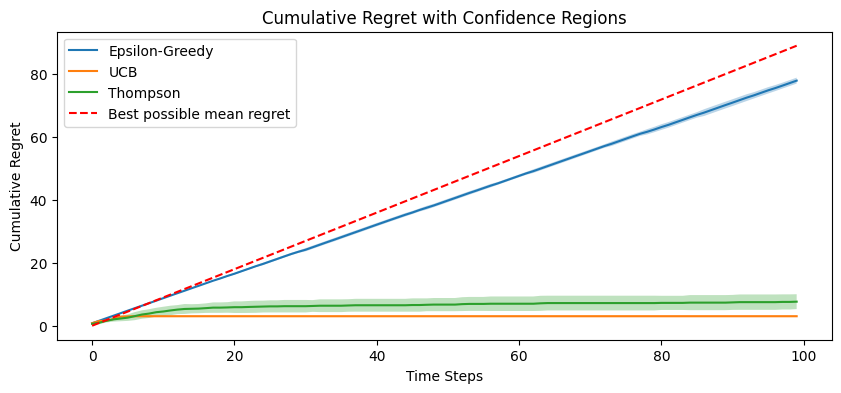

In [41]:
# Parameters
num_arms = 5
num_pulls = 100
epsilon = 0.1 # This is the exploration parameter of epsilon-greedy
c = 2 # This is the exploration parameter of UCB
probs = [0.1, 0.2, 0.9, 0.3, 0.12]  # Enter your desired probabilities here

# Create a multi-armed bandit instance
bandit = MultiArmedBandit(probs)

# Number of runs
num_runs = 10

# Initialize arrays to store cumulative rewards, cumulative regrets
epsilon_cumulative_rewards = np.zeros((num_runs, num_pulls))
ucb_cumulative_rewards = np.zeros((num_runs, num_pulls))
thompson_cumulative_rewards = np.zeros((num_runs, num_pulls))

epsilon_cumulative_regrets = np.zeros((num_runs, num_pulls))
ucb_cumulative_regrets = np.zeros((num_runs, num_pulls))
thompson_cumulative_regrets = np.zeros((num_runs, num_pulls))

# Run the algorithms multiple times
for run in range(num_runs):
    # Run epsilon-greedy algorithm
    epsilon_cumulative_reward, epsilon_cumulative_regret, _ = epsilon_greedy(bandit, epsilon, num_pulls)
    epsilon_cumulative_rewards[run] = epsilon_cumulative_reward
    epsilon_cumulative_regrets[run] = epsilon_cumulative_regret

    # Run UCB algorithm
    ucb_cumulative_reward, ucb_cumulative_regret, _ = UCB(bandit, c, num_pulls)
    ucb_cumulative_rewards[run] = ucb_cumulative_reward
    ucb_cumulative_regrets[run] = ucb_cumulative_regret

    # Run Thompson sampling algorithm
    thompson_cumulative_reward, thompson_cumulative_regret, _ = thompson_sampling(bandit, num_pulls)
    thompson_cumulative_rewards[run] = thompson_cumulative_reward
    thompson_cumulative_regrets[run] = thompson_cumulative_regret

# Calculate the mean and standard deviation of the cumulative rewards
epsilon_mean_reward = np.mean(epsilon_cumulative_rewards, axis=0)
epsilon_std_reward = np.std(epsilon_cumulative_rewards, axis=0)
ucb_mean_reward = np.mean(ucb_cumulative_rewards, axis=0)
ucb_std_reward = np.std(ucb_cumulative_rewards, axis=0)
thompson_mean_reward = np.mean(thompson_cumulative_rewards, axis=0)
thompson_std_reward = np.std(thompson_cumulative_rewards, axis=0)

# Calculate the mean and standard deviation of the cumulative regrets
epsilon_mean_regret = np.mean(epsilon_cumulative_regrets, axis=0)
epsilon_std_regret = np.std(epsilon_cumulative_regrets, axis=0)
ucb_mean_regret = np.mean(ucb_cumulative_regrets, axis=0)
ucb_std_regret = np.std(ucb_cumulative_regrets, axis=0)
thompson_mean_regret = np.mean(thompson_cumulative_regrets, axis=0)
thompson_std_regret = np.std(thompson_cumulative_regrets, axis=0)

# Plotting
time_steps = np.arange(num_pulls)

# Plot cumulative reward with confidence regions
plt.figure(figsize=(10, 4))
plt.plot(time_steps, epsilon_mean_reward, label='Epsilon-Greedy')
plt.fill_between(time_steps, epsilon_mean_reward - epsilon_std_reward, epsilon_mean_reward + epsilon_std_reward, alpha=0.3)
plt.plot(time_steps, ucb_mean_reward, label='UCB')
plt.fill_between(time_steps, ucb_mean_reward - ucb_std_reward, ucb_mean_reward + ucb_std_reward, alpha=0.3)
plt.plot(time_steps, thompson_mean_reward, label='Thompson')
plt.fill_between(time_steps, thompson_mean_reward - thompson_std_reward, thompson_mean_reward + thompson_std_reward, alpha=0.3)
plt.plot(time_steps, np.max(bandit.true_probs) * time_steps, label='Best possible mean reward', linestyle='--', color='red')
plt.xlabel('Time Steps')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.title('Cumulative Reward with Confidence Regions')
plt.show()

# Plot cumulative regret with confidence regions
plt.figure(figsize=(10, 4))
plt.plot(time_steps, epsilon_mean_regret, label='Epsilon-Greedy')
plt.fill_between(time_steps, epsilon_mean_regret - epsilon_std_regret, epsilon_mean_regret + epsilon_std_regret, alpha=0.3)
plt.plot(time_steps, ucb_mean_regret, label='UCB')
plt.fill_between(time_steps, ucb_mean_regret - ucb_std_regret, ucb_mean_regret + ucb_std_regret, alpha=0.3)
plt.plot(time_steps, thompson_mean_regret, label='Thompson')
plt.fill_between(time_steps, thompson_mean_regret - thompson_std_regret, thompson_mean_regret + thompson_std_regret, alpha=0.3)
plt.plot(time_steps, np.max(bandit.true_probs) * time_steps, label='Best possible mean regret', linestyle='--', color='red')
plt.xlabel('Time Steps')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.title('Cumulative Regret with Confidence Regions')
plt.show()